# Customers' Default Payment
#### Problem Description 
This Project examine the case of customers' default payment in Taiwan and builds a predictive model to predict the probability of default among customer.

#### Data Information
project data available at [https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients]

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX: Gender (1 = male; 2 = female).
- EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- MARIAGE: Marital status (1 = married; 2 = single; 3 = others).
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005. 
- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
df = pd.read_excel("default of credit card clients.xls", skiprows=1)

In [3]:
# viewing the first five rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# viewing the last five rows of the dataset
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
# Transposing the dataframe to easily view all the rows
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [6]:
# checking the data type of the dataset
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [7]:
# Checking the Null values in the dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
# Turning the columns into lower and replace the space in the 'default payment next month'
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
df.marriage.unique()

array([1, 2, 3, 0])

In [10]:
# mapping the categorical data to its respective classes
sex_values = {1: "male", 2: "female"}
df.sex = df.sex = df.sex.map(sex_values)

In [11]:
education_values = {1: "graduate school", 2: "university", 3: "high school", 4: "others", 5: "unk", 6: "unk", 0: "unk"}
df.education = df.education.map(education_values)

In [12]:
marital_status_values = {1: "married", 2: "single", 3: "others", 0: "unk"}
df.marriage = df.marriage.map(marital_status_values)

In [13]:
# Some columns are not neccessarily numerical columns but categorical
categorical_columns_list = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for col in categorical_columns_list:
    df[col] = df[col].astype("O")

In [14]:
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

In [15]:
# checking for duplicated values
df[df.duplicated()]

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month


In [16]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [16]:
# dropping the unnecessary id column
df.drop("id", axis=1, inplace=True)

In [17]:
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
# removing the "unk" class
df = df[df.education != "unk"].reset_index(drop=True)

In [19]:
df = df[df.marriage != "unk"].reset_index(drop=True)

### Exploratory Data Analysis

In [20]:
# Checking all the numerical columns
numerical_cols = df.select_dtypes("int64").columns
numerical_cols

Index(['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default_payment_next_month'],
      dtype='object')

In [21]:
# Age seems to have the highest correlation with default payment
df[numerical_cols].corr()["default_payment_next_month"].sort_values(ascending = False)

default_payment_next_month    1.000000
age                           0.014424
bill_amt6                    -0.005339
bill_amt5                    -0.006226
bill_amt4                    -0.009474
bill_amt3                    -0.013494
bill_amt2                    -0.013710
bill_amt1                    -0.019303
pay_amt6                     -0.053692
pay_amt5                     -0.056075
pay_amt3                     -0.056288
pay_amt4                     -0.057012
pay_amt2                     -0.058307
pay_amt1                     -0.073881
limit_bal                    -0.154357
Name: default_payment_next_month, dtype: float64

In [22]:
# Numerical column without the target varible
target_excluded = numerical_cols[:-1]

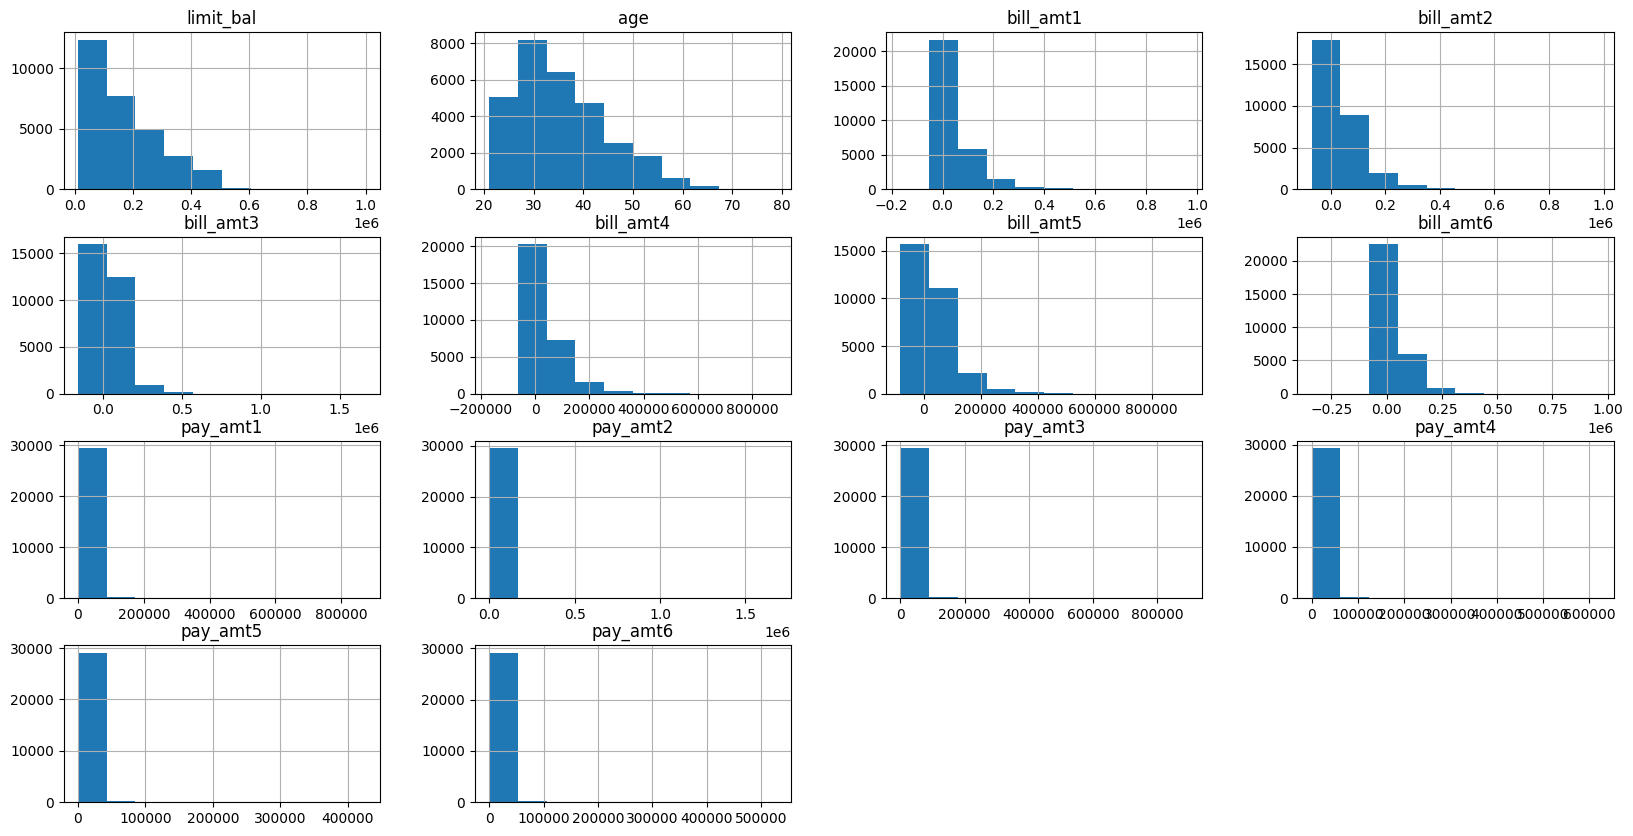

In [23]:
# Checking the distribution of the numerical columns
# Some of the columns are skewed
df[target_excluded].hist(figsize=[20,10]);

In [24]:
# From the visualization above looks like there are skewed column in the dataset, this function will check their skewness

def skew_function():
    
    """ I want to pull out all the skewed columns in the dataframe"""
    
    skew_value = []
    
    for col in target_excluded:
        skew_col = df[col].skew()
        skew_value.append((col , skew_col))
    return sorted(skew_value , key = lambda x : x[1] , reverse = True)

skew_function()

[('pay_amt2', np.float64(30.629261988793434)),
 ('pay_amt3', np.float64(17.419065789625716)),
 ('pay_amt1', np.float64(14.772584053129824)),
 ('pay_amt4', np.float64(12.93192018492139)),
 ('pay_amt5', np.float64(11.192055374089845)),
 ('pay_amt6', np.float64(10.819672461702723)),
 ('bill_amt3', np.float64(3.10668661516685)),
 ('bill_amt5', np.float64(2.880165903626221)),
 ('bill_amt6', np.float64(2.852904777183379)),
 ('bill_amt4', np.float64(2.828389550474199)),
 ('bill_amt2', np.float64(2.7166949703963574)),
 ('bill_amt1', np.float64(2.6738799367064843)),
 ('limit_bal', np.float64(0.9928498687236367)),
 ('age', np.float64(0.7373094047362696))]

In [25]:
skewed_cols = ['pay_amt2','pay_amt3', 'pay_amt1', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'bill_amt3', 'bill_amt5', 'bill_amt6', 'bill_amt4', 'bill_amt2', 'bill_amt1']

In [26]:
df[skewed_cols].isnull().sum()

pay_amt2     0
pay_amt3     0
pay_amt1     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
bill_amt3    0
bill_amt5    0
bill_amt6    0
bill_amt4    0
bill_amt2    0
bill_amt1    0
dtype: int64

In [27]:
# Transforming the skewed columns using np.log
df[skewed_cols] = df[skewed_cols].apply(lambda x : np.log(x+1))

In [28]:
df

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,1
1,120000,female,university,single,26,-1,2,0,0,0,...,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,1
2,90000,female,university,single,34,0,0,0,0,0,...,9.570250,9.612400,9.651816,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,0
3,50000,female,university,married,37,0,0,0,0,0,...,10.251147,10.273671,10.293771,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,9.949464,9.859901,9.859118,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29596,220000,male,high school,married,39,0,0,0,0,0,...,11.385149,10.349391,9.679156,9.047939,9.903538,8.517993,8.022241,8.517393,6.908755,0
29597,150000,male,high school,single,43,-1,-1,-1,-1,0,...,9.102755,8.554682,0.000000,7.516433,8.168203,9.104869,4.867534,0.000000,0.000000,0
29598,30000,male,university,single,37,4,3,2,-1,0,...,9.946499,9.932221,9.870861,0.000000,0.000000,9.998843,8.343078,7.601402,8.039480,1
29599,80000,male,high school,married,41,1,-1,0,0,0,...,10.873793,9.380589,10.798452,11.360951,8.134468,7.072422,7.563720,10.877387,7.498316,1


In [29]:
# The transformation of the skewed columns gave nan values for zeros in the column

#### Identifying Outliers in the columns
Columns with extreme values

In [30]:
def outliers_check():
        cols_store = []
    
        for col in target_excluded: 
            q1 = df[col].quantile(.25)
            q3 = df[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                cols_store.append(col)

        return cols_store

In [31]:
outlier_cols = outliers_check()
outlier_df = df[outlier_cols]

In [32]:
# there are null values introduced as a result of skewness transformation
df.isnull().sum()

limit_bal                       0
sex                             0
education                       0
marriage                        0
age                             0
pay_0                           0
pay_2                           0
pay_3                           0
pay_4                           0
pay_5                           0
pay_6                           0
bill_amt1                     572
bill_amt2                     647
bill_amt3                     625
bill_amt4                     642
bill_amt5                     625
bill_amt6                     654
pay_amt1                        0
pay_amt2                        0
pay_amt3                        0
pay_amt4                        0
pay_amt5                        0
pay_amt6                        0
default_payment_next_month      0
dtype: int64

In [33]:
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,1
1,120000,female,university,single,26,-1,2,0,0,0,...,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,1
2,90000,female,university,single,34,0,0,0,0,0,...,9.570250,9.612400,9.651816,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,0
3,50000,female,university,married,37,0,0,0,0,0,...,10.251147,10.273671,10.293771,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,9.949464,9.859901,9.859118,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,0


In [34]:
# filling the nan values that was introduced after skewness transformation
# for col in df.columns:
#     df[col] = df[col].fillna(df[col].median())

In [35]:
df.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
count,29601.000000,29601.000000,2.902900e+04,2.895400e+04,2.897600e+04,2.895900e+04,2.897600e+04,2.894700e+04,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,35.464072,-inf,-inf,-inf,-inf,-inf,-inf,6.624898,6.557041,6.279755,6.078506,6.036181,5.940142,0.223134
std,129944.020953,9.213243,NaN,NaN,NaN,NaN,NaN,NaN,3.252327,3.279587,3.348682,3.395711,3.441729,3.521644,0.416355
min,10000.000000,21.000000,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,8.335431e+00,8.216358e+00,8.122074e+00,7.970568e+00,7.727425e+00,7.411858e+00,6.908755,6.716595,5.968708,5.700444,5.560682,4.934474,0.000000
50%,140000.000000,34.000000,1.006879e+01,1.002464e+01,9.948509e+00,9.879553e+00,9.834646e+00,9.793282e+00,7.650169,7.604894,7.496097,7.313887,7.313887,7.313887,0.000000
75%,240000.000000,41.000000,1.112853e+01,1.108578e+01,1.102528e+01,1.093258e+01,1.083843e+01,1.081846e+01,8.518392,8.517393,8.412055,8.297793,8.304742,8.294300,0.000000
max,1000000.000000,79.000000,1.377938e+01,1.379931e+01,1.432479e+01,1.370076e+01,1.373989e+01,1.377642e+01,13.680324,14.336837,13.705741,13.339088,12.963438,13.178114,1.000000


In [36]:
outlier_df.isnull().sum()

limit_bal      0
age            0
bill_amt1    572
bill_amt2    647
bill_amt3    625
bill_amt4    642
bill_amt5    625
bill_amt6    654
pay_amt1       0
pay_amt2       0
pay_amt3       0
pay_amt4       0
pay_amt5       0
dtype: int64

In [37]:
outlier_df = outlier_df.replace([np.inf, -np.inf], np.nan)
outlier_df = outlier_df.fillna(0)
outlier_df.reset_index(drop=True)

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5
0,20000,24,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000
1,120000,26,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000
2,90000,34,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816,7.325808,7.313887,6.908755,6.908755,6.908755
3,50000,37,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771,7.601402,7.610853,7.090910,7.003974,6.975414
4,50000,57,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118,7.601402,10.510041,9.210440,9.105091,6.536692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29596,220000,39,12.149232,12.169492,12.247051,11.385149,10.349391,9.679156,9.047939,9.903538,8.517993,8.022241,8.517393
29597,150000,43,7.428927,7.511525,8.161375,9.102755,8.554682,0.000000,7.516433,8.168203,9.104869,4.867534,0.000000
29598,30000,37,8.179200,8.118803,7.922624,9.946499,9.932221,9.870861,0.000000,0.000000,9.998843,8.343078,7.601402
29599,80000,41,0.000000,11.269324,11.242494,10.873793,9.380589,10.798452,11.360951,8.134468,7.072422,7.563720,10.877387


In [38]:
outlier_df.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,167550.544914,35.464072,9.028666,8.839779,8.711476,8.558995,8.403018,8.207753,6.624898,6.557041,6.279755,6.078506,6.036181
std,129944.020953,9.213243,3.261494,3.472252,3.579556,3.659496,3.727735,3.874948,3.252327,3.279587,3.348682,3.395711,3.441729
min,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,8.168770,7.996654,7.883446,7.753624,7.484930,7.153834,6.908755,6.716595,5.968708,5.700444,5.560682
50%,140000.000000,34.000000,10.010547,9.954703,9.905286,9.852510,9.803225,9.747944,7.650169,7.604894,7.496097,7.313887,7.313887
75%,240000.000000,41.000000,11.106820,11.058764,10.999279,10.901764,10.821237,10.802062,8.518392,8.517393,8.412055,8.297793,8.304742
max,1000000.000000,79.000000,13.779378,13.799312,14.324789,13.700758,13.739894,13.776421,13.680324,14.336837,13.705741,13.339088,12.963438


In [39]:
# the standard scaler module from the scikit learn library helps to normalize values
from sklearn.preprocessing import StandardScaler

In [40]:
# normalizing the outlier columns
scaler = StandardScaler()
scaled = scaler.fit_transform(outlier_df)

In [41]:
outlier_df = pd.DataFrame(scaled, columns=outlier_df.columns)

In [42]:
outlier_df

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5
0,-1.135512,-1.244325,-0.231907,-0.230302,-0.607567,-2.338885,-2.254227,-2.118194,-2.037006,-0.006205,-1.875323,-1.790084,-1.753852
1,-0.365937,-1.027242,-0.347692,-0.399234,-0.228184,-0.127214,-0.068448,-0.030364,-2.037006,0.107245,0.187838,0.244503,-1.753852
2,-0.596810,-0.158912,0.384685,0.204203,0.224446,0.276342,0.324434,0.372673,0.215514,0.230779,0.187838,0.244503,0.253532
3,-0.904640,0.166712,0.530148,0.559888,0.585010,0.462408,0.501829,0.538344,0.300253,0.321330,0.242235,0.272545,0.272900
4,-0.904640,2.337536,0.010100,-0.056638,0.495945,0.379968,0.390829,0.426171,0.300253,1.205355,0.875191,0.891311,0.145427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29596,0.403638,0.383794,0.956806,0.958965,0.987730,0.772292,0.522142,0.379728,0.745030,1.020419,0.668405,0.572419,0.720933
29597,-0.135065,0.817959,-0.490501,-0.382540,-0.153681,0.148591,0.040686,-2.118194,0.274127,0.491278,0.843664,-0.356624,-1.753852
29598,-1.058555,0.166712,-0.260458,-0.207643,-0.220381,0.379158,0.410230,0.429202,-2.037006,-1.999383,1.110631,0.666903,0.454785
29599,-0.673767,0.600876,-2.768307,0.699715,0.707088,0.632556,0.262247,0.668588,1.456229,0.480991,0.236714,0.437387,1.406644


In [43]:
df[outlier_cols] = outlier_df

In [44]:
# Making sure the data does not contain, missing values or infinity values
df.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
count,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,2.960100e+04,29601.000000,29601.000000
mean,9.217540e-17,2.611636e-16,3.600602e-17,3.442175e-16,-2.366796e-16,1.123388e-16,-7.009171e-17,-3.264546e-17,3.571797e-16,-7.585268e-17,2.131556e-16,1.651476e-16,-9.121524e-18,5.940142,0.223134
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,3.521644,0.416355
min,-1.212470e+00,-1.569948e+00,-2.768307e+00,-2.545877e+00,-2.433716e+00,-2.338885e+00,-2.254227e+00,-2.118194e+00,-2.037006e+00,-1.999383e+00,-1.875323e+00,-1.790084e+00,-1.753852e+00,0.000000,0.000000
25%,-9.046398e-01,-8.101597e-01,-2.636556e-01,-2.428220e-01,-2.313258e-01,-2.200809e-01,-2.462898e-01,-2.719874e-01,8.727961e-02,4.865146e-02,-9.288803e-02,-1.113370e-01,-1.381594e-01,4.934474,0.000000
50%,-2.120221e-01,-1.589122e-01,3.010573e-01,3.211009e-01,3.335134e-01,3.534740e-01,3.756252e-01,3.974807e-01,3.152476e-01,3.195132e-01,3.632364e-01,3.638125e-01,3.712459e-01,7.313887,0.000000
75%,5.575530e-01,6.008765e-01,6.371892e-01,6.390729e-01,6.391412e-01,6.401996e-01,6.487211e-01,6.695194e-01,5.822068e-01,5.977538e-01,6.367688e-01,6.535669e-01,6.591454e-01,8.294300,0.000000
max,6.406324e+00,4.725444e+00,1.456630e+00,1.428357e+00,1.568185e+00,1.405070e+00,1.431692e+00,1.437119e+00,2.169384e+00,2.372228e+00,2.217623e+00,2.138199e+00,2.012760e+00,13.178114,1.000000


#### Feature Importance
Mutual Information concept from information theory, it tells us how much we can learn about one varible if we know the value of another.

In [46]:
# Using mutual information from sklearn library
from sklearn.metrics import mutual_info_score

In [47]:
# checking the mutual score for all categorical variables
def mutual_info_default_payment_score(series):
    return mutual_info_score(series, df.default_payment_next_month)

In [48]:
df

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,-1.135512,female,university,married,-1.244325,2,2,-1,-1,-2,...,-2.338885,-2.254227,-2.118194,-2.037006,-0.006205,-1.875323,-1.790084,-1.753852,0.000000,1
1,-0.365937,female,university,single,-1.027242,-1,2,0,0,0,...,-0.127214,-0.068448,-0.030364,-2.037006,0.107245,0.187838,0.244503,-1.753852,7.601402,1
2,-0.596810,female,university,single,-0.158912,0,0,0,0,0,...,0.276342,0.324434,0.372673,0.215514,0.230779,0.187838,0.244503,0.253532,8.517393,0
3,-0.904640,female,university,married,0.166712,0,0,0,0,0,...,0.462408,0.501829,0.538344,0.300253,0.321330,0.242235,0.272545,0.272900,6.908755,0
4,-0.904640,male,university,married,2.337536,-1,0,-1,0,0,...,0.379968,0.390829,0.426171,0.300253,1.205355,0.875191,0.891311,0.145427,6.522093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29596,0.403638,male,high school,married,0.383794,0,0,0,0,0,...,0.772292,0.522142,0.379728,0.745030,1.020419,0.668405,0.572419,0.720933,6.908755,0
29597,-0.135065,male,high school,single,0.817959,-1,-1,-1,-1,0,...,0.148591,0.040686,-2.118194,0.274127,0.491278,0.843664,-0.356624,-1.753852,0.000000,0
29598,-1.058555,male,university,single,0.166712,4,3,2,-1,0,...,0.379158,0.410230,0.429202,-2.037006,-1.999383,1.110631,0.666903,0.454785,8.039480,1
29599,-0.673767,male,high school,married,0.600876,1,-1,0,0,0,...,0.632556,0.262247,0.668588,1.456229,0.480991,0.236714,0.437387,1.406644,7.498316,1


In [49]:
# Applying the mutual info score to all categorical variables
# We can see that History of past payment rank higher than others
df[categorical_columns].apply(mutual_info_default_payment_score).sort_values(ascending=False)

pay_0        0.076955
pay_2        0.049431
pay_3        0.037381
pay_4        0.032980
pay_5        0.030705
pay_6        0.026566
education    0.002129
sex          0.000787
marriage     0.000538
dtype: float64

### Modelling Training

In [50]:
# splitting the dataset into train/validation/ test data
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [51]:
# reseting the index of the dataframes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [52]:
# Assigning the outputs
y_train = df_train.default_payment_next_month
y_val = df_val.default_payment_next_month
y_test = df_test.default_payment_next_month

In [53]:
del df_train["default_payment_next_month"]
del df_val["default_payment_next_month"]
del df_test["default_payment_next_month"]

#### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [58]:
# Turning the training data into dictionary
train_dicts = df_train.to_dict(orient="records")

In [59]:
# Vectorizing the dictionary
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [60]:
# Training the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
# Testing the model
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [66]:
# Prediction
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [67]:
# computing the auc score for testing dataset
roc_auc_score(y_val, y_pred)

np.float64(0.6056032934974389)

In [59]:
# limiting the dept of the tree to 3
dt =  DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [60]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print("train:", auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("val:", auc)

train: 0.738825915115748
val: 0.7100740105241297


In [61]:
# Visualing the tree
from sklearn.tree import export_text

In [64]:
export_text(dt, feature_names=dv.get_feature_names_out())

'|--- pay_0 <= 1.50\n|   |--- pay_2 <= 1.50\n|   |   |--- pay_amt3 <= 0.07\n|   |   |   |--- class: 0\n|   |   |--- pay_amt3 >  0.07\n|   |   |   |--- class: 0\n|   |--- pay_2 >  1.50\n|   |   |--- pay_6 <= 1.00\n|   |   |   |--- class: 0\n|   |   |--- pay_6 >  1.00\n|   |   |   |--- class: 1\n|--- pay_0 >  1.50\n|   |--- pay_3 <= -0.50\n|   |   |--- bill_amt5 <= -0.33\n|   |   |   |--- class: 1\n|   |   |--- bill_amt5 >  -0.33\n|   |   |   |--- class: 0\n|   |--- pay_3 >  -0.50\n|   |   |--- pay_5 <= 1.00\n|   |   |   |--- class: 1\n|   |   |--- pay_5 >  1.00\n|   |   |   |--- class: 1\n'

### Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In [62]:
# Getting the appropriate max_depth
for d in [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print("%4s  -> %.3f" % (d, auc))



   1  -> 0.637
   2  -> 0.681
   3  -> 0.710
   4  -> 0.722
   5  -> 0.735
   6  -> 0.736
   7  -> 0.732
   8  -> 0.719
  10  -> 0.691
  15  -> 0.634
  20  -> 0.600
None  -> 0.611


In [63]:
# Getting the appropriate min sample leaf
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s,  auc))

In [64]:
# Creating a DataFrame of the scores
columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.tail(20)

,max_depth,min_samples_leaf,auc
52,15.0,200,0.751215
53,15.0,500,0.743924
54,20.0,1,0.593668
55,20.0,2,0.610974
56,20.0,5,0.645113
57,20.0,10,0.672922
58,20.0,15,0.705943
59,20.0,20,0.707632
60,20.0,100,0.742204
61,20.0,200,0.751223


In [65]:
df_scores.sort_values(by="auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
70,NaN,200,0.751244
61,20.0,200,0.751223
52,15.0,200,0.751215
34,7.0,200,0.750665
43,10.0,200,0.750378


In [66]:
# The min_samplesLeaf of 200 seems to be the best, I will pick 15 max depth
dt = DecisionTreeClassifier(max_depth= 15, min_samples_leaf= 200)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=200)

### Random forest

- Random forest - ensembling decision trees
- turning random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7363366990361616)

In [70]:
# iterating over different values of estimators
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [71]:
df_score = pd.DataFrame(scores, columns= ["n_estimators", "auc"])
df_score

,n_estimators,auc
0,10,0.714727
1,20,0.733662
2,30,0.734261
3,40,0.736611
4,50,0.736754
5,60,0.737669
6,70,0.737753
7,80,0.738300
8,90,0.740276
9,100,0.740898


In [73]:
# 200 estimators seems to be good

# iterating over different values of depths
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth = d,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [74]:
column= ["max_depth", "n_estimators", "auc"]
df_score = pd.DataFrame(scores, columns= column)
df_score

,max_depth,n_estimators,auc
0,5,10,0.753780
1,5,20,0.758355
2,5,30,0.759799
3,5,40,0.759901
4,5,50,0.759268
5,5,60,0.758879
6,5,70,0.759344
7,5,80,0.759230
8,5,90,0.759582
9,5,100,0.759354


In [75]:
# getting the best min leave parameter 

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth = 10,
                                    min_samples_leaf= s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [76]:
# the min_samples_leaf does not affect the performance of the model in this
# instance, I will go with 1
column= ["min_samples_leaf", "n_estimators", "auc"]
df_score = pd.DataFrame(scores, columns= column)
df_score.tail(30)

,min_samples_leaf,n_estimators,auc
70,10,110,0.762990
71,10,120,0.763041
72,10,130,0.763338
73,10,140,0.763397
74,10,150,0.763377
75,10,160,0.763361
76,10,170,0.763346
77,10,180,0.763442
78,10,190,0.763539
79,10,200,0.763618


In [77]:
# 10 max_depth, 50 n_estimators and min_sample_leaf 1 gives the best result

rf = RandomForestClassifier(n_estimators= 50,
                            max_depth = 10,
                            min_samples_leaf= 1,
                            random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, random_state=1)

### Gradient boosting and XGBoost

- Performance monitoring
- Parsing xgboost's monitoring output

In [78]:
import xgboost as xgb

In [79]:
# wrap the data into special data structure called DMatrix(optimized to train xgboost faster)
features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names= features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names= features)

In [80]:
# setting xgboost parameters, training the model
xgb_params ={
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "nthread": 8,
    "seed": 1,
    "verbosity": 2,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [81]:
y_pred = model.predict(dval)

In [82]:
roc_auc_score(y_val, y_pred)

np.float64(0.7624615761867144)

In [83]:
# We can evaluate the data on validation dataset after each tree is trained
watchlist = [(dtrain, "train"), (dval, "val")]

In [84]:
%%capture output
# setting xgboost parameters
xgb_params ={
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 2,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [85]:
print(output.stdout)

[0]	train-auc:0.77830	val-auc:0.74013
[5]	train-auc:0.81872	val-auc:0.75959
[10]	train-auc:0.83505	val-auc:0.76271
[15]	train-auc:0.85125	val-auc:0.76177
[20]	train-auc:0.86522	val-auc:0.75873
[25]	train-auc:0.87781	val-auc:0.75803
[30]	train-auc:0.89109	val-auc:0.75631
[35]	train-auc:0.90076	val-auc:0.75821
[40]	train-auc:0.90920	val-auc:0.75905
[45]	train-auc:0.91517	val-auc:0.75809
[50]	train-auc:0.92387	val-auc:0.75623
[55]	train-auc:0.92767	val-auc:0.75594
[60]	train-auc:0.93151	val-auc:0.75605
[65]	train-auc:0.93577	val-auc:0.75394
[70]	train-auc:0.94130	val-auc:0.75336
[75]	train-auc:0.94612	val-auc:0.75295
[80]	train-auc:0.95069	val-auc:0.75274
[85]	train-auc:0.95491	val-auc:0.75250
[90]	train-auc:0.95841	val-auc:0.75274
[95]	train-auc:0.96221	val-auc:0.75087
[100]	train-auc:0.96593	val-auc:0.75091
[105]	train-auc:0.96878	val-auc:0.75007
[110]	train-auc:0.97088	val-auc:0.74865
[115]	train-auc:0.97249	val-auc:0.74845
[120]	train-auc:0.97545	val-auc:0.74818
[125]	train-auc:0.9786

In [86]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split("\n"):
        it_line, train_line, val_line = line.split("\t")

        it = int(it_line.strip("[]"))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])

        results.append((it, train, val))

    columns = ["num_iter", "train_auc", "val_auc"]
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [87]:
df_score = parse_xgb_output(output)

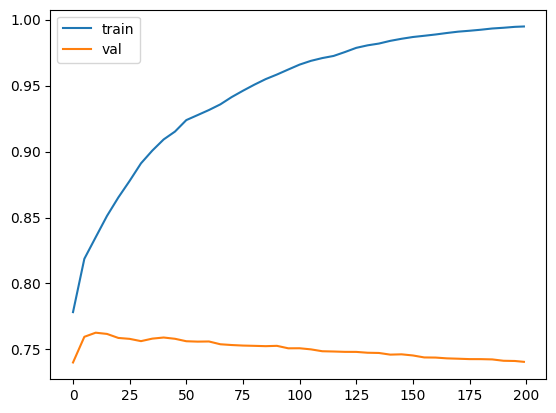

In [88]:
# plotting training against validation
plt.plot(df_score.num_iter, df_score.train_auc, label="train")
plt.plot(df_score.num_iter, df_score.val_auc, label="val")

plt.legend()

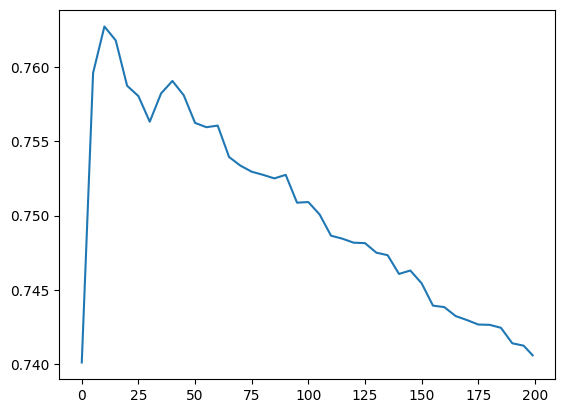

In [89]:
plt.plot(df_score.num_iter, df_score.val_auc, label="val")

### XGBOOST parameter turning

Tuning the following parameters:
- `eta`
- `max`
- `min_child_weight`

In [93]:
scores = {}

In [100]:
%%capture output
# setting xgboost parameters
xgb_params ={
    "eta": 0.1,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 2,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
etas = ["eta=1.0", "eta=0.3", "eta=0.1"]

In [101]:
key = "eta=%s" % (xgb_params["eta"])
scores[key] = parse_xgb_output(output)

In [102]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1'])

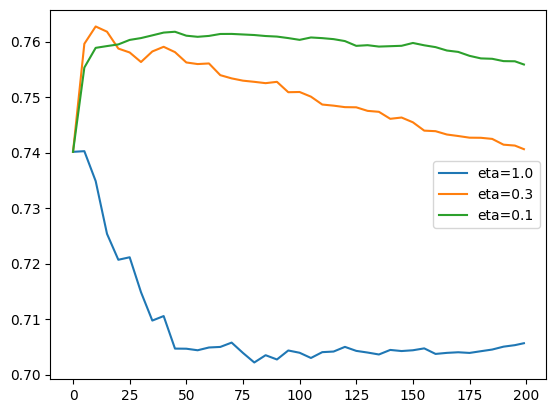

In [103]:
# Plotting the eta's more accurately
etas = ["eta=1.0", "eta=0.3", "eta=0.1"]

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

In [107]:
# Tuning max_depth
scores = {}
max_depth = [3, 4, 5, 10]

In [117]:
%%capture output
# setting xgboost parameters
xgb_params ={
    "eta": 0.3,
    "max_depth": 10,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 2,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [118]:
key = "max_depth=%s" % (xgb_params["max_depth"])
scores[key] = parse_xgb_output(output)

In [119]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=5', 'max_depth=10'])

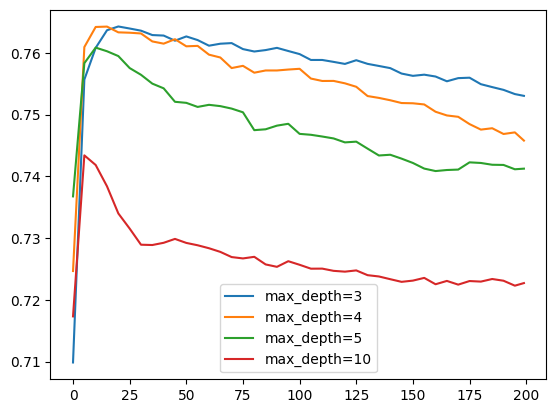

In [121]:
# Plotting the max_depth's more accurately
etas = ["eta=1.0", "eta=0.3", "eta=0.1"]

for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
#plt.ylim(0.76, 0.80)
plt.legend()

In [126]:
# Tuning the min_child_weight
scores = {}
min_child_weight = [1, 5, 10, 20, 30]

In [139]:
%%capture output
# setting xgboost parameters
xgb_params ={
    "eta": 0.1,
    "max_depth": 4,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 2,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [140]:
key = "min_child_weight=%s" % (xgb_params["min_child_weight"])
scores[key] = parse_xgb_output(output)

In [141]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=20', 'min_child_weight=30'])

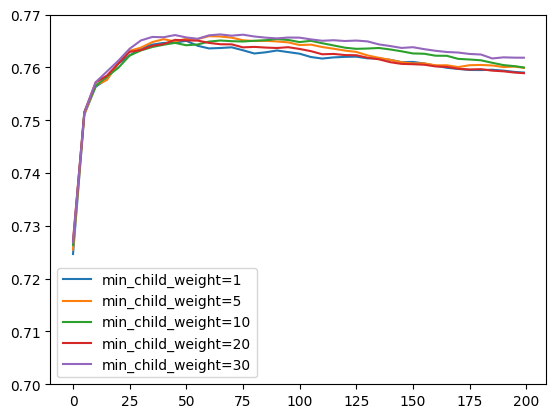

In [143]:
# Plotting the max_depth's more accurately
etas = ["eta=1.0", "eta=0.3", "eta=0.1"]

for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.70, 0.77)
plt.legend()

In [144]:
# Final model
xgb_params ={
    "eta": 0.3,
    "max_depth": 4,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 2,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

### Selecting the final model
- Choosing between xgboost, random forest and decision tree
- Training the final model
- saving the model

In [145]:
# The min_samplesLeaf of 200 seems to be the best, I will pick 15 max depth
dt = DecisionTreeClassifier(max_depth= 15, min_samples_leaf= 200)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=200)

In [146]:
# Performance of Decision tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7512438607626468)

In [147]:
# 10 max_depth, 50 n_estimators and min_sample_leaf 1 gives the best result

rf = RandomForestClassifier(n_estimators= 50,
                            max_depth = 10,
                            min_samples_leaf= 1,
                            random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, random_state=1)

In [148]:
# Performance of Random Forest
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7640841755677925)

In [149]:
# Xgboost
xgb_params ={
    "eta": 0.3,
    "max_depth": 4,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 2,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [150]:
# Performance of Xgboost
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.7611121732722306)

In [68]:
import pickle

In [156]:
# Picking Random Forest as the final model
with open("model.bin", "wb") as f_out:
    pickle.dump((dv,  rf), f_out)

### Load model

In [69]:
with open("model.bin", "rb") as f_in:
    dv, rf = pickle.load(f_in)

In [70]:
dv, rf

(DictVectorizer(sparse=False),
 RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, random_state=1))

In [81]:
customer = df_train.iloc[20]

In [82]:
customer = customer.to_dict()

In [83]:
X = dv.transform([customer])

In [84]:
y_pred = rf.predict_proba(X)[0, 1]

In [85]:
# This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.
if y_pred < 0.5:
    print("This customer is not likely to default Payment")
else:
    print("This customer is likely to default Payment")

This customer is not likely to default Payment


In [86]:
def predict(data):
    customer = data.to_dict()
    X = dv.transform([customer])
    y_pred = rf.predict_proba(X)[0, 1]
    
    if y_pred < 0.5:
        return "This customer is not likely to default Payment"
    else:
        return "This customer is likely to default Payment"

In [87]:
predict(df_train.iloc[20])

'This customer is not likely to default Payment'

In [88]:
df_train.iloc[20]

limit_bal       -0.90464
sex               female
education    high school
marriage          others
age             0.817959
pay_0                  0
pay_2                  0
pay_3                  0
pay_4                  0
pay_5                  0
pay_6                  0
bill_amt1        0.52233
bill_amt2       0.551491
bill_amt3       0.578119
bill_amt4       0.607357
bill_amt5      -0.023854
bill_amt6      -2.118194
pay_amt1        0.267874
pay_amt2        0.318448
pay_amt3        0.187838
pay_amt4        0.244503
pay_amt5       -1.753852
pay_amt6             0.0
Name: 20, dtype: object